# Warning: The code here is just my stream of consciousness, don't expect clean code here

In [1]:

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from tabulate import tabulate
from collections import Counter

import copy



In [2]:
SOL_PRICE = 50
mostProfitableBotUSDCRaw7 = ["BXajkkesUadt1Fa23rJpx1aawbpxEKf4dD8NUBdchHbR", 423268.680331, "6JEYj7t842hGSnQUDRCpdy8fhTYm5sRxDdsxb89HEqPw", 237572.38291000004, "8GnqoarPr749mdzfDYYLQjCFm2fW6XuF5Ji4pVPpazeL", 210736.37398200002, "GjtTWjJ6hRemHVP48wMxQ9KrhpayYHLwJtsvWP5G8m2P", 204323.161045, "Ab7uZRHpyC3LV82T1toYaDWqsAYZbFzFHz7Q9mNZ6EqN", 112953.39592, "4qfMyvVxAUMWLceyaiWrXxD9mXhZCZ32d16cArQ5MmfX", 106135.94097, "EDMGEpKKGKS7nxpu1gjLmuHHWAmvLNy3BZWDxNC3nhAt", 81648.916595, "6hyuGqKQyhAEipjtaquiNHfd1dVjrNT3FzzanXurbK4W", 77702.130259, "EFtvVdhGYobBWux75PRsyaQRJYsMtdHF2SH9PuSUGYdy", 76508.39673400001, "jitoRMkoNb2LTTwkJJCoUEKd4WTDvKrRwPbZcpfB3s8", 50617.279527000006, "BdxkPBXL1YfxSKGmHrk7t8qwtZiqAmRUqMfVCH1Vrx7N", 41171.047259, "AasQTQH9oroodW5vi3uEoDuLyJDVfMz7GWehvisdGmDX", 36644.982336, "A2YFiSyzaXktEz2hzbKRL41ML57R8EeSddjwReV3pzfZ", 33690.333946, "3heTLmaYyWpQhvfYztMWBhzB9wqRqVgZofYtdw8778gf", 31376.504451000004, "J3xKkSUowia5q483zwQmijSfnVocGsWg6duFzQYHL9Nn", 27543.34143, "GqC7CsH4eMJth4f6UAfGByG1D8vD59xjAokMvL7WSQFG", 26152.120207000004, "iuwtfpp8yzDrJNQbHXBSufSCZKhGctw5bQFAx23VgBH", 25902.989144999996, "AChUR4By6CZaZvYfBHAYyJfaC2Hami8trcfcjJcsEwdu", 24913.790414, "Fsb16JMXAWLML5PTLKVh5Lg1xviVB6ah5p7YYcJEw3g2", 24453.287176, "4KVBskF8LWptkBCC1Ldj98Ym7ndHhvVfnwS3AJDwUSzw", 23704.268231000002, "FMCWkr6DMpRQZsyYxGqwDt92Pxr72nVqMuKYUcT9Lwuv", 23203.363194, "FAdiGyEZ6D9HU3ahZtqJ1NmZFqAx9zNzaP1vGDinmHum", 22972.75098, "Ai5ZrhuwvDiLubv7gNpVS1v9qrKo5kxfARZGtKagkvH9", 19115.342647, "BfFnFMGgewgeCQ9MBEQzt5BCwVCb5heVwGDtTpbJuWec", 18050.785086000004, "YKkw2F6wJvCrVJhAtJhvU7Peqe2WdgJYVuoyg3fAsXX", 17607.513758, "Gn35xm6fr3ByUJt9aC6ZSzSqzb15AyryhKQmZVoP56Z1", 14995.193905, "vDLP7RpsmFfSv2XqGVh34f8ATB1Ee9ZyqG9idqH8nL5", 13329.806931000001, "2yqtmwucK6fbPctDdTz48qUsqz9Sgv6rvH9wgzTq2mt1", 12803.978000000001, "8ndi5A1AjFnfsbpzpksoFF8g1ciixVXTgf3XLEkvmNFj", 10891.160351000002, "CLiAgG3pS3i8tqRBp4BgjbAMtwk6E8yt2zxDQebpvBxo", 9788.340632000001, "DbYy1rdts56w5GRSSFsxVuXUUT3t1A8TUrh2NYFQ37LQ", 9207.906358, "H4xj8MsJvtwXEddCqtFA6ZfT4E4or4K5Ky9w2WbEMbcU", 7968.822468, "777ppJpDzoBgxiBtgfnqy3FG8Z82qRrF9qrRUHVXipor", 7823.104794000001, "Asod9HPcSj14hbmYqvUUdYjN965aiwUtTMP4BfrHmPMV", 7026.630715000001, "4pXvPjSwskCmY6sP4bgNRTtXa42btbURGSzrEtZsspqN", 6420.4207480000005, "3b3zfYBQ61sEicY4bhQMKUvRo9bAxPYAz32uyAP9Cj9u", 5877.078409, "F6jUJmWfXGKXe9uAHLzro7JqwM2crD9KA6sxHqr3o22q", 5431.188141, "FhuJfyiM3hH32qA3NYz1NADnZhu3GzSw4pL1pcfFNW5Y", 4973.375836, "2rYtU6gF2P3aJqV8AAKL16WW5dFz6wgTbG6tQUugNZEw", 4832.496594, "DPxTeVqHAPyMNEnT1kj8T1MvTAtuERd78wLurRrDE9HD", 4612.567797, "botU1zmaQoP7BrNEr3VJ3BapMJDWnf5WUZJQFuc5cAu", 4427.064121, "2XzwE53Zz2EEbjE1Gwr6RGgW8XDVmQSX9AUXyVyPjv5f", 4011.55738, "3R2JQwxorGF8HW7y8iDQQDmbwJEFzopdEwALtrVf5LRF", 3871.6812170000003, "DQVd8jwHw2tz2gtRqJAmYtZ7aEQLLqUZe4BU3wEBZa9L", 3819.1722560000003, "76smKuE7YTjLYHbwbeMHBuvfrpQM7wt4f4gkxkQ38bCx", 3739.683844, "DnTtpNnbpb94Hku1pby3RHy7cCkrWmcVBDXJfqSb8wUz", 3632.6507850000003, "BFWgBMPyYVT8J1E3HLytUKF9KBgBwBFjni92AiixPC7t", 3499.723547, "DEGENg8vKRMeMsBvjRGizKu6GxZesTbwDr4Fb7TZhURH", 3382.6709360000004, "9sKUu9e5Yy3nCcwgZwWyi1YeQqRihCFctjaTEgGryGRU", 3233.5301350000004, "9aH7PQxKLGv2Z6PRGjvBLuKYGKqFncRfSUeg4ztzrZCM", 3181.0050010000004]

mostProfitableBotSOLRaw7 = ["AasQTQH9oroodW5vi3uEoDuLyJDVfMz7GWehvisdGmDX", 4939.598473635001, "EDMGEpKKGKS7nxpu1gjLmuHHWAmvLNy3BZWDxNC3nhAt", 1814.51563916, "44PJ3JyrkUvJPDrauYzNAyKV2CB4FHQLKdxf4xX9HyQu", 1264.025654852, "BFBvSCGA5i83oq9c2R4hGJ5DPcP1HLr8LiRVYvskhYRC", 525.3562810259999, "J3xKkSUowia5q483zwQmijSfnVocGsWg6duFzQYHL9Nn", 512.564251005, "9gbEY6F7ZcAYNFjVevZjk2LKto8ToRVxbzkQhp4eAkF5", 411.7, "DKSYirKtix5kxDTKDYU9J8XtGsAGHnjFWVNvGuy3fkUB", 325.4, "BqDYEmjaqvU4ikFkYqYsnnXzPxwMuCiJaFQx1BFdgJ7F", 221.1959, "CLiLSn8rtVn2JesEaH1RhsNGLNZv8htVNeLgY8RvZRLn", 195.46339201199999, "BqWadhf8g51jKTSV156wJ9wz2HWN7sRUzUmtAyLuefGL", 179.9, "6jUZzXutPPtiVPLvZjnb3C96RhrY1KF4Q66DXEhqhCCJ", 173.09240000000003, "3heTLmaYyWpQhvfYztMWBhzB9wqRqVgZofYtdw8778gf", 149.785803284, "Ab7uZRHpyC3LV82T1toYaDWqsAYZbFzFHz7Q9mNZ6EqN", 145.684559074, "2rYtU6gF2P3aJqV8AAKL16WW5dFz6wgTbG6tQUugNZEw", 130.215328418, "AChUR4By6CZaZvYfBHAYyJfaC2Hami8trcfcjJcsEwdu", 125.85354709500001, "7LEjmUahcmqS4jHjyKk2XFz9qMPY7X8zkiJHdM1QrQbf", 111.7, "8XVQRnXbHtbGVPW3hhszv3sVmErUW4pgx2qDc5LwJZw6", 110.50000000000001, "ESb88rUn7wKMZkXaV33aGn8DbEBV3heeSrAoUnQzSZsA", 104.63900000000001, "3b3zfYBQ61sEicY4bhQMKUvRo9bAxPYAz32uyAP9Cj9u", 92.83603951700002, "BfFnFMGgewgeCQ9MBEQzt5BCwVCb5heVwGDtTpbJuWec", 83.55267059600001, "777ppJpDzoBgxiBtgfnqy3FG8Z82qRrF9qrRUHVXipor", 77.381094557, "9aH7PQxKLGv2Z6PRGjvBLuKYGKqFncRfSUeg4ztzrZCM", 72.44787351000001, "DFf5m8vwvk32Aa3bmhdtfJtJw4mxtuZivFoKPtkpA3Xx", 52.34910000000001, "2ZwKsXZyeWbZCkUcqdLNRD8pd88HCQFRXX1Nu1VgmWos", 36.263163545, "TvRqU2QYcSQnkgwGR6EPYXwSu5JpkSKci87pw1HXubj", 30.400000000000002, "Ai5ZrhuwvDiLubv7gNpVS1v9qrKo5kxfARZGtKagkvH9", 29.249871665, "EDEG8c7wqLkyvGVLzHmckZcUFUjxkcHCUvGo58CzH6QR", 25.694081604, "6pbs2e7xsagetXrQJUgXhKpn2Wdf66brvbCx6nsouR9W", 25.429302046, "Fsb16JMXAWLML5PTLKVh5Lg1xviVB6ah5p7YYcJEw3g2", 22.106376611, "FrJZ4DP12Tg7r8rpjMqknkpCbJihqbEhfEBBQkpFimaS", 10.612725969000001, "777u44GynP5HqdNRsn6ER9w4de9HZYZM5PTk97ZWfktu", 8.369833579, "A4gG7n7aFaBonYgqgiF9Ubi4pNLwu4MCG8dWxSdwxUm5", 6.673953955000001, "FRNTRNETordzE2StXDiAXfUvAodYDi2inucS4rhw2vkm", 6.487192799000001, "JA6hRexXi9UjWpBqopis25A6SLnkWqPJ61mPm3UqTcB5", 5.179551592, "9JYspCD2BJA9sqCt2Dvfbt1CiJwLeWBzmLjJEMJ2Pa85", 3.8000000000000003, "Hn89Mfv6frLHSpXEkScRXgzJCwpo9W5foPBLV1mvuj4i", 3.6265358040000004, "AYfQFYhwHimmR3mfMZocbkezVQ4gFCxjCu5V8eEAspye", 3.5060429060000002, "33SSk9GYW8bmRPYs1KWZwNoam2E1KHh4QGiSy6gaoEiR", 3.106057985, "5Ynw6eUT4aU1GszjVVX61iuTsQwxVpc9ESLEMHf7Czvr", 2.4431105100000003, "BFWgBMPyYVT8J1E3HLytUKF9KBgBwBFjni92AiixPC7t", 2.136862304, "7nwSP8wauNYCvJHHTn5cDjkQE83FssW9ZHp8hiyqRbuK", 2.1, "EqceoWhxTa5KWgX3FP3ZSQ7fLuMNe42Bb6fj22CyvYQj", 1.872236927, "EHRtMnnTkFg1szXQwDtLXbubuYhBt6GF6n8bHtZbxHLe", 1.6, "7pZdcXsS74fqybfw6stRXP6bcTac3MQFKUZgy2bNsB5w", 1.3619571730000002, "8LAqNjXSMwMx8zKCrhX7PUbY9xTvtqxStATp6s1ADgeC", 1.2455886660000002, "4jrk34dCydbLja97S9Vdk72xFsP2cU3qxLqbwAxttaJK", 1.1, "JARJ8Srh7v19fv4Xt6YRR9CZTYE4eLix93SVVfMQsgxT", 1.014885945, "F7VWhHp9ckt15SjNckTvTiBjiHeVtsJdu6jhwYELoyfz", 0.9156861730000001, "74qfP8X4eNDwkvahQ3Q9CBxXXff4pCBVYgUiDj3bzaxi", 0.8, "C7CkJM7aJspxT8gC6JHG8W5PXy7u1hR4DyBR7Y8Kzdwa", 0.645206229]

mostProfitableBotUSDCBots = [mostProfitableBotUSDCRaw7]
mostProfitableBotSOLBots = [mostProfitableBotSOLRaw7 ]
days = [7]
totalBotProfit = Counter()
totalUSDCProfit = 0
totalSOLProfit = 0

mostProfitableBotSol = [["SOL profit", "signer"]]
mostProfitableBotUsdc = [["USDC profit", "signer"]]
mostProfitableBotTotal = []

for i, data in enumerate(mostProfitableBotUSDCBots):
    day = ("0" if i == 0 else str(days[i-1])) + " - " + str(days[i])
    curTable = [[day +" days USDC profit", "signer"]]
    for i in range(0, len(data), 2):
        curTable.append([ "${:,.2f}".format(data[i+1]), data[i]])
        signer = data[i]
        profit = data[i+1]
        totalBotProfit[signer] += profit
        totalUSDCProfit += profit
    print(tabulate(curTable, headers='firstrow'))
    print()

for i, data in enumerate(mostProfitableBotSOLBots):
    day = ("0" if i == 0 else str(days[i-1])) + " - " + str(days[i])
    curTable = [[day +" days SOL profit", "signer"]]
    for i in range(0, len(data), 2):
        curTable.append([ "{:,.2f} SOL".format(data[i+1]), data[i]])
        signer = data[i]
        profit = data[i+1] * SOL_PRICE
        totalBotProfit[signer] += profit
        totalSOLProfit += profit
    print(tabulate(curTable, headers='firstrow'))
    print()


for signer, profit in totalBotProfit.items():
    mostProfitableBotTotal.append([ "${:,.2f}".format(profit), signer]) 
    
mostProfitableBotTotal.sort(key= lambda x: (-float( x[0].replace(",", "").replace('$', "")), x[1]))
mostProfitableBotTotal.insert(0,["Total profit", "signer"])
print(tabulate(mostProfitableBotTotal, headers='firstrow'))
print()
print("totalProfit ${:,.2f}".format(sum(totalBotProfit.values())))

print("USDC Originate Percentage", totalUSDCProfit * 100 / (totalUSDCProfit + totalSOLProfit) )

0 - 7 days USDC profit    signer
------------------------  --------------------------------------------
$423,268.68               BXajkkesUadt1Fa23rJpx1aawbpxEKf4dD8NUBdchHbR
$237,572.38               6JEYj7t842hGSnQUDRCpdy8fhTYm5sRxDdsxb89HEqPw
$210,736.37               8GnqoarPr749mdzfDYYLQjCFm2fW6XuF5Ji4pVPpazeL
$204,323.16               GjtTWjJ6hRemHVP48wMxQ9KrhpayYHLwJtsvWP5G8m2P
$112,953.40               Ab7uZRHpyC3LV82T1toYaDWqsAYZbFzFHz7Q9mNZ6EqN
$106,135.94               4qfMyvVxAUMWLceyaiWrXxD9mXhZCZ32d16cArQ5MmfX
$81,648.92                EDMGEpKKGKS7nxpu1gjLmuHHWAmvLNy3BZWDxNC3nhAt
$77,702.13                6hyuGqKQyhAEipjtaquiNHfd1dVjrNT3FzzanXurbK4W
$76,508.40                EFtvVdhGYobBWux75PRsyaQRJYsMtdHF2SH9PuSUGYdy
$50,617.28                jitoRMkoNb2LTTwkJJCoUEKd4WTDvKrRwPbZcpfB3s8
$41,171.05                BdxkPBXL1YfxSKGmHrk7t8qwtZiqAmRUqMfVCH1Vrx7N
$36,644.98                AasQTQH9oroodW5vi3uEoDuLyJDVfMz7GWehvisdGmDX
$33,690.33                A2YFiSyzaXktEz2hzbK

In [3]:
# Pie chart
headers = list(totalBotProfit.keys())
values = list(totalBotProfit.values())

df = pd.DataFrame(
    data = {"totalBotProfit": totalBotProfit.values(), "signer": totalBotProfit.keys() },
    ).sort_values('totalBotProfit', ascending = False)
df2 = df[:10].copy()

#others
new_row = pd.DataFrame(data = {
    'signer' : ['others'],
    'totalBotProfit' : [df['totalBotProfit'][5:].sum()]
})

#combining top 5 with others
df2 = pd.concat([df2, new_row])
print(df2)


    totalBotProfit                                        signer
0     4.232687e+05  BXajkkesUadt1Fa23rJpx1aawbpxEKf4dD8NUBdchHbR
11    2.836249e+05  AasQTQH9oroodW5vi3uEoDuLyJDVfMz7GWehvisdGmDX
1     2.375724e+05  6JEYj7t842hGSnQUDRCpdy8fhTYm5sRxDdsxb89HEqPw
2     2.107364e+05  8GnqoarPr749mdzfDYYLQjCFm2fW6XuF5Ji4pVPpazeL
3     2.043232e+05  GjtTWjJ6hRemHVP48wMxQ9KrhpayYHLwJtsvWP5G8m2P
6     1.723747e+05  EDMGEpKKGKS7nxpu1gjLmuHHWAmvLNy3BZWDxNC3nhAt
4     1.202376e+05  Ab7uZRHpyC3LV82T1toYaDWqsAYZbFzFHz7Q9mNZ6EqN
5     1.061359e+05  4qfMyvVxAUMWLceyaiWrXxD9mXhZCZ32d16cArQ5MmfX
7     7.770213e+04  6hyuGqKQyhAEipjtaquiNHfd1dVjrNT3FzzanXurbK4W
8     7.650840e+04  EFtvVdhGYobBWux75PRsyaQRJYsMtdHF2SH9PuSUGYdy
0     1.384099e+06                                        others


Arbitrage Profit by Signer


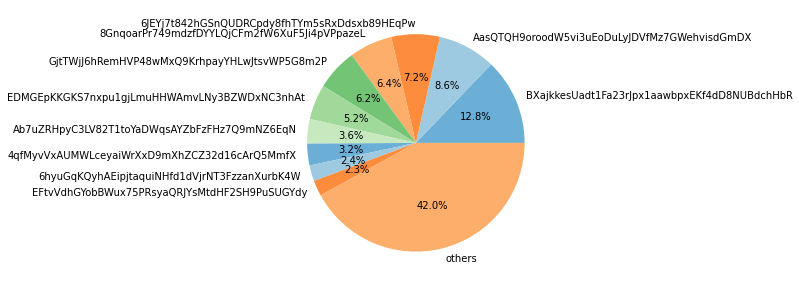

In [4]:
print("Arbitrage Profit by Signer")
cmap = plt.get_cmap("tab20c")

inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10, 11]))
plot = df2.plot.pie(y='totalBotProfit', 
                    colors=inner_colors,
                    figsize=(5, 5) ,autopct='%1.1f%%', labels = df2['signer'], legend=None, ylabel="", title=None)

Counter({'05': 3044569.074523102, '03': 1085321.7491005312, '04': 769647.1763556552})
total profit past 60 days $4,899,538.00


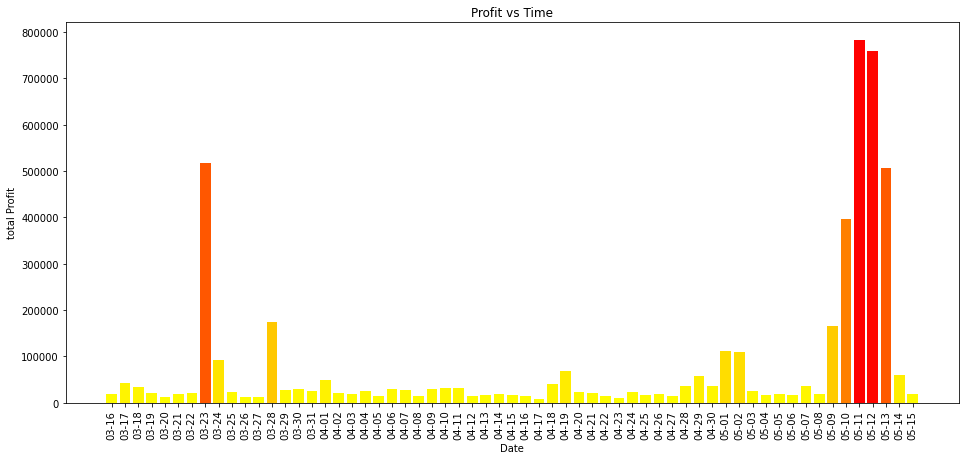

In [5]:
profitOverTime = ["2022-03-16 00:00", 83.522144068, 14569.401181000001, "2022-03-17 00:00", 343.231755956, 26261.814238131, "2022-03-18 00:00", 320.17105992, 18967.722318, "2022-03-19 00:00", 145.73661373500002, 14637.332556000001, "2022-03-20 00:00", 43.289391145, 9717.118584000002, "2022-03-21 00:00", 82.284625002, 15141.990869000001, "2022-03-22 00:00", 8.712044383, 20858.26518, "2022-03-23 00:00", 27.134639635000003, 515191.776308, "2022-03-24 00:00", 132.263436097, 84642.644777, "2022-03-25 00:00", 63.11553175800001, 19760.654387, "2022-03-26 00:00", 18.422850659, 11969.889950000003, "2022-03-27 00:00", 19.258137011000002, 12602.715017, "2022-03-28 00:00", 71.10077422100001, 170941.148768, "2022-03-29 00:00", 9.053760528000002, 26364.662572999998, "2022-03-30 00:00", 109.807505008, 25328.699268999997, "2022-03-31 00:00", 33.249791222, 22848.210108, "2022-04-01 00:00", 56.868979647, 46241.310427000004, "2022-04-02 00:00", 47.98925347800001, 19239.928383, "2022-04-03 00:00", 37.480703625, 17019.672811, "2022-04-04 00:00", 36.818442421, 24395.804447000002, "2022-04-05 00:00", 52.538505877, 11835.497563, "2022-04-06 00:00", 99.829813139, 24449.51251616, "2022-04-07 00:00", 45.554387094000006, 25704.56369642, "2022-04-08 00:00", 23.995821488, 14363.628495, "2022-04-09 00:00", 11.347352862000001, 29099.627647, "2022-04-10 00:00", 10.509754025000001, 31581.338054, "2022-04-11 00:00", 16.501635898, 32002.377020999997, "2022-04-12 00:00", 15.948142908000001, 14075.226965, "2022-04-13 00:00", 29.891906477, 15288.392943000003, "2022-04-14 00:00", 100.39578717500001, 14459.210685, "2022-04-15 00:00", 18.750635021000001, 16066.553824, "2022-04-16 00:00", 20.804005276, 12614.066351000001, "2022-04-17 00:00", 13.186891646000001, 6976.910223000001, "2022-04-18 00:00", 43.706815263, 37525.952955, "2022-04-19 00:00", 134.120112067, 61222.36639, "2022-04-20 00:00", 35.594758858000006, 20576.409317791, "2022-04-21 00:00", 18.903211018, 20381.146, "2022-04-22 00:00", 24.150502089, 13724.885980000001, "2022-04-23 00:00", 18.015510991000003, 9734.054562, "2022-04-24 00:00", 21.347363754, 21405.554028984, "2022-04-25 00:00", 28.455730132000003, 16344.515297, "2022-04-26 00:00", 29.294403844999998, 18120.298586, "2022-04-27 00:00", 31.228656063000006, 13030.523578, "2022-04-28 00:00", 31.819037910000002, 34185.385544, "2022-04-29 00:00", 33.70954868300001, 57155.349958000006, "2022-04-30 00:00", 22.615064356, 35258.475453, "2022-05-01 00:00", 78.852374712, 107350.672545, "2022-05-02 00:00", 68.726012736, 106720.766569852, "2022-05-03 00:00", 23.283698147000003, 25264.07154, "2022-05-04 00:00", 40.625408101, 15253.283654000003, "2022-05-05 00:00", 56.174813992000004, 15568.772572000002, "2022-05-06 00:00", 108.172333498, 12172.366086000002, "2022-05-07 00:00", 86.46789415, 31211.941404, "2022-05-08 00:00", 39.137127525, 16496.148753, "2022-05-09 00:00", 286.83475022, 152298.33578599998,"2022-05-10 00:00", 397.747338287, 375542.222661, "2022-05-11 00:00", 2237.5445244280004, 669839.024, "2022-05-12 00:00", 1970.8126617570001, 660302.5374350001, "2022-05-13 00:00", 5074.594528617, 252876.15908300004, "2022-05-14 00:00", 265.227044255, 47201.587416, "2022-05-15 00:00", 92.3499628, 15143.661357]
totalProfitWithoutWH = 0
time = []
timeProfit = []
monthlyProfit = Counter()
for i in range(0, len(profitOverTime), 3):
    solProfit = profitOverTime[i+1]
    usdcProfit = profitOverTime[i+2]
    date = profitOverTime[i].split(" ")[0]
    time.append(date.replace("2022-", "").replace("2021-", ""))
    totalProfitWithoutWH += solProfit * SOL_PRICE + usdcProfit
    timeProfit.append(solProfit * SOL_PRICE + usdcProfit)
    monthlyProfit[date.split("-")[1]] += (solProfit * SOL_PRICE + usdcProfit)
    
print(monthlyProfit)
print("total profit past 60 days", "${:,.2f}".format(totalProfitWithoutWH))
x_pos = [i for i, _ in enumerate(time)]
my_cmap = plt.get_cmap("autumn_r")

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(7)
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(x_pos, timeProfit, color=my_cmap(rescale(timeProfit)))
plt.xlabel("Date")
plt.ylabel("total Profit")
plt.title("Profit vs Time")

plt.xticks(x_pos, time, rotation='vertical')

plt.show()


In [6]:
topTxUsdcRaw7 = ["5XNouYtMoYmkDu594vqhbhUfSTFECvVpktTK7HvisehyGqharcQb2RTQTTE74aZcHVg1DfPU9CC15xT56QVwURhy", "6hyuGqKQyhAEipjtaquiNHfd1dVjrNT3FzzanXurbK4W", 45067.348477, "3RsqVQpu5EMVEs7T1fSUdwYk4aoVDPw36ShoA9FzxwihY8uM6atd47tHSVZ3vKrn5f1J94SAwNrn5MoP4PEFZ3tp", "jitoRMkoNb2LTTwkJJCoUEKd4WTDvKrRwPbZcpfB3s8", 39324.830329, "5bDsgnNsyJCMG87GEGaNPr9XbpdcETAJtiUaEm6hoZr43BzXag3jqVgX8NP9YaDQTB9Zqh8kPzrVR2ViR6FypaaL", "8GnqoarPr749mdzfDYYLQjCFm2fW6XuF5Ji4pVPpazeL", 12570.916268, "3WQjUgFDJft62dBodnjv7Exfy5ukc11z2RBdBCAXrsYnq68HQ4jNXaM6dZBtZpsyV5NttKNUjaVkMVsZ4uDqsmcU", "8GnqoarPr749mdzfDYYLQjCFm2fW6XuF5Ji4pVPpazeL", 12505.954056, "5P6Tbu5RiyFQ6YYHBpst7LhokGf7QFbXGmXr2YCsUhu6P3VFa4mUV2rujdPjJVPk1dzGzL5rbJ2i28DQ4fENQAMr", "4qfMyvVxAUMWLceyaiWrXxD9mXhZCZ32d16cArQ5MmfX", 10883.774768000001, "4poTjZfPKCcNgMwihB2FVvxkA8MPeTqJq6XGxQBoSU5yntpi9nf9TLx6uPH5QoxnLjnFvs9CXDjhV9inqTUW6676", "4qfMyvVxAUMWLceyaiWrXxD9mXhZCZ32d16cArQ5MmfX", 10731.196551, "4SrPeHYshXZpDUu9Hp7tttEoD7WPdhNZzSxAi15QuYV35uaAsAp5DgUwW1i2oECHf9VFCNeVjz8YZ6x3f3Uuwxrh", "4qfMyvVxAUMWLceyaiWrXxD9mXhZCZ32d16cArQ5MmfX", 7173.020603000001, "2G5zTuBEgJ7eLbhrFAmjkX3P5Th5LQtWiNkYs2MY12RSxssmsPiiEssc5UAfCtE2mSLrBoNvTPQaXBHPEEZ6i5gq", "8GnqoarPr749mdzfDYYLQjCFm2fW6XuF5Ji4pVPpazeL", 5631.789462000001, "45J6fWZGd2VvEM7AfXmQUPxZx7PV3dHxamw21DkmWyMHeaMLR6TCEicHp3UT7SxPC377LtcKat5VEbh6F7YovUAq", "Ab7uZRHpyC3LV82T1toYaDWqsAYZbFzFHz7Q9mNZ6EqN", 5362.489753, "2Y1GbHXX1aTYPaimcMJ9LGh5aNWaJfQjy7bQD4S6FD9GKUBEDwVnS1RUrReibyninsEE3abAzhwhpAyJwGhjPHc6", "BXajkkesUadt1Fa23rJpx1aawbpxEKf4dD8NUBdchHbR", 5252.047366000001, "r52fXp8HUqVjxYuqyvZjzht2tdBPf5rZpHYnAkuZesgj5Ao2uRyCtMb93TMRZxYhgbtcc9bMykL9sKkeTgrMd2v", "GjtTWjJ6hRemHVP48wMxQ9KrhpayYHLwJtsvWP5G8m2P", 5035.0942350000005, "3wrt55ippuBLMcFg9Z9MTHeAqPzcA3HXBwqUzkA66VZpZehadXdJgiytWe6P5QaHRDyuCEcf9Mz7fdGapyWqbUKz", "BXajkkesUadt1Fa23rJpx1aawbpxEKf4dD8NUBdchHbR", 4912.101794, "2MwYBZ1L1LK17VT8UuvkWvhxhDcwRAu2tGMHacdEzDZcPeGrkQ6wNJjRqqVsTa9kok9eNBnByFZx247JSY28Lbuh", "BXajkkesUadt1Fa23rJpx1aawbpxEKf4dD8NUBdchHbR", 4700.295684000001, "2Ao9eeJrhqhUwD5csnibxX79HGxmqEGBjvKRzgALaapGLVDRczLVNm1UAAqEG32N4XTBQUPJMoP6CPzx9dhPFW2d", "FAdiGyEZ6D9HU3ahZtqJ1NmZFqAx9zNzaP1vGDinmHum", 4557.905125, "2aUAUqq7k7domPvQLFUDmwsAJpKyA4SjQdBtHH6U1T1iKVzTmVdYXyjZ19oigpig7eD8bRTTgJ8FN9QTDSXnnj6e", "BXajkkesUadt1Fa23rJpx1aawbpxEKf4dD8NUBdchHbR", 4505.727193000001, "3wQ5aU1WrUDDThYReo9LCVQVHBCBnu3AET2JLgjXFhifatvv8gwR17VxzXQhkuJhV11wDVXspQH2UzpiGXQLQhKg", "EFtvVdhGYobBWux75PRsyaQRJYsMtdHF2SH9PuSUGYdy", 4299.655702, "4VVDu1426TCYtmFF8a2Ro7nuzzcP7C7WnPUXbp41UrP5f5KFHjAnViwyvY4x1w5YWv1VgnF1vmor9PZRL3yq6Bye", "BXajkkesUadt1Fa23rJpx1aawbpxEKf4dD8NUBdchHbR", 4205.415841, "i6C77fsqEx3kEMuQRAQ2AchcbemmivL6dxAwedqfkCk1k9uMSNa38rdRedaa3Ef1khYi9Uf61rory1Q9kyUKphZ", "6JEYj7t842hGSnQUDRCpdy8fhTYm5sRxDdsxb89HEqPw", 4192.4697240000005, "48v4cCvwKymyRB2VQdNMdjorZw74FrFBxyEjTsDWYaKDCDJpb8Q7iJa7o9spJCMYBsp74C8zScu4uZTTTEFWgP12", "Fsb16JMXAWLML5PTLKVh5Lg1xviVB6ah5p7YYcJEw3g2", 4164.032681000001, "3YCi7jv5aTQ8djsHXQcghi38B1Lt96NkkUZyzk4A3tkoLGJr51tJauqtF2yTo6B2ZrUNuJWvvgj8faPaSLGC6UYa", "6JEYj7t842hGSnQUDRCpdy8fhTYm5sRxDdsxb89HEqPw", 4146.781816000001, "2rqowrCfniXCSUNFtdvKgG8jRaLtrSdtcC33xZABag4DLiTb9KpFhE9iPAaZNQsQzYW9y9MaNfFgNNc4DGUWhjsU", "8GnqoarPr749mdzfDYYLQjCFm2fW6XuF5Ji4pVPpazeL", 4133.639833, "2AsaNYdnZiGN3ZDdrQiCgod7E7K9x5uFR8RErTWZggiJhBDhTTXBaeQwtb6Xkdz6kgD6aqeFapFMD2WzTjbKZw7p", "FAdiGyEZ6D9HU3ahZtqJ1NmZFqAx9zNzaP1vGDinmHum", 4091.7160300000005, "3TQaq93bSym9xsaBkbxhBUYY7ZNCWQqFzinuPQFStKJgTk58wPHbuAVq83MzJv48vY8bUTEjWeEn4rAtHZdkzooH", "8GnqoarPr749mdzfDYYLQjCFm2fW6XuF5Ji4pVPpazeL", 4081.9394300000004, "oNdrFiNCt76jspPbaDKtcSgjPdjEBW2ckFsE5Yi2NNJzuXspaNG855Wx9UUH5WxpGgwCXSi68rCCrMq9Ypesua5", "jitoRMkoNb2LTTwkJJCoUEKd4WTDvKrRwPbZcpfB3s8", 3833.0737500000005, "3DBT5eFRpvJBkBcnbGN9g6rHmtaWAec77K5F9G3qDN3bh4wVYYtDJmfXWCUo4rbcjCsQBozKk1yEKLybmk5feyMt", "BXajkkesUadt1Fa23rJpx1aawbpxEKf4dD8NUBdchHbR", 3760.9352120000003]

topTxsUSDC = [topTxUsdcRaw7 ]

signerCount = Counter()
for i, data in enumerate(topTxsUSDC):
    day = ("0" if i == 0 else str(days[i-1])) + " - " + str(days[i])
    curTable = [[day + "days Top USDC profit", "signer", "TxId"]]
    for i in range(0, len(data), 3):
        curTable.append([ "${:,.2f}".format(data[i+2]), data[i+1], data[i]])
        signerCount[data[i]] += 1
    print(tabulate(curTable, headers='firstrow'))
    print()
    

# print(sorted(list(signerCount.items()), key = lambda x: x[1]))

0 - 7days Top USDC profit    signer                                        TxId
---------------------------  --------------------------------------------  ----------------------------------------------------------------------------------------
$45,067.35                   6hyuGqKQyhAEipjtaquiNHfd1dVjrNT3FzzanXurbK4W  5XNouYtMoYmkDu594vqhbhUfSTFECvVpktTK7HvisehyGqharcQb2RTQTTE74aZcHVg1DfPU9CC15xT56QVwURhy
$39,324.83                   jitoRMkoNb2LTTwkJJCoUEKd4WTDvKrRwPbZcpfB3s8   3RsqVQpu5EMVEs7T1fSUdwYk4aoVDPw36ShoA9FzxwihY8uM6atd47tHSVZ3vKrn5f1J94SAwNrn5MoP4PEFZ3tp
$12,570.92                   8GnqoarPr749mdzfDYYLQjCFm2fW6XuF5Ji4pVPpazeL  5bDsgnNsyJCMG87GEGaNPr9XbpdcETAJtiUaEm6hoZr43BzXag3jqVgX8NP9YaDQTB9Zqh8kPzrVR2ViR6FypaaL
$12,505.95                   8GnqoarPr749mdzfDYYLQjCFm2fW6XuF5Ji4pVPpazeL  3WQjUgFDJft62dBodnjv7Exfy5ukc11z2RBdBCAXrsYnq68HQ4jNXaM6dZBtZpsyV5NttKNUjaVkMVsZ4uDqsmcU
$10,883.77                   4qfMyvVxAUMWLceyaiWrXxD9mXhZCZ32d16cArQ5MmfX  5P6Tbu5RiyFQ6YYHBpst7Lhok

In [7]:
label = ["signer", "SOL", "USDC", "soETH", "BTC", "SRM", "USDT", "soFTT", "ORCA", "RAY", "SBR", "MER", "mSOL", "ETH", "SLND", "scnSOL", "UST", "FTT", "cSOL", "cUSDC", "csoETH", "cBTC", "cSRM", "cUSDT", "csoFTT", "cORCA", "cRAY", "cSBR", "cMER", "cmSOL", "cETH", "cSLND", "cscnSOL", "cstSOL", "cUST", "cFTT"]
liquidatedAmount = ["rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 52135.100177208005, 289310.50079900003, 208.370452, 36.455096000000005, 78951.78284999999, 105879.310022, 5972.336818000001, 0, 174896.125384, 209259.855598, 0, 27148.273464071, 145.0947397, 65996.69443399999, 10.684583795, 4522421.863215, 2146.2528454300004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "qyF7Txt2MGUTXkiyJQtirCvnJCZfVLVzMkXzX4oqA4B", 4853.216245618, 195.706589, 7.6695020000000005, 5.801081000000001, 1621.8626049999998, 894.855314, 36.313721, 93.76687500000001, 6786.421341, 26.410472000000002, 30.373577, 1533.542896081, 3.6817303800000003, 2973.1943520000004, 9.834044720000001, 2202990.198146, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "qC4HMsFFQGvqSso7ugfzgamnRj3KPqvC2o2SJYfJFDJ", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.002385, 0, 0.021684018000000003, 0.027205000000000003, 0, 0, 0.002242, 0, 0, 0, 1.209896, 0, 0, 0.013454466000000002, 0.011547350000000001, 0, 0, 0, 602.637578, 0, "mX1PTTahRGwiU84WbweeN3o8DsxAc7Nn1iydDG97yPa", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.001767777, 1713.591137, 0, 0, 0, 0, 0, 0, 15.744024000000001, 0, 0, 0, 0, 0, 0, 0.056770557000000006, 14877.936467000001, 0, "JDHt3bH3AKv727aGFuktwdFrYoNyfHTFGagkYL5BR3ZU", 0.019321541, 0, 0, 0, 0, 0.000409, 0, 0, 0.000005, 0, 0, 0.000015799000000000002, 0, 0, 0, 214.325932, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "HpC81sxDJAstAEyc8h6Jmw5tuYZB3GiH1rRqgMT9CNex", 0.000314976, 0, 0, 0, 0, 0, 0, 0, 0.00009800000000000001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "HCMRVfbhtQMRXGS6w4K5a57mwugy5m72VxGFkf3K4nt7", 786.847319818, 1918.3703940000003, 0.057217000000000004, 0.00419, 91.23004800000001, 117.410936, 0.219974, 0, 1474.953765, 2118.665121, 931.5732409999998, 388.80925863699997, 0.00413772, 1234.630293, 0.0018653650000000001, 968694.6879119999, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "GrpxXURbMUHKHeRqboRU1jwxhHVf2VDCLxLDJhd3w9bT", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "F4q2bm6k4AW2rgQMBfvoNnfn1xFkoD98We6uJd6tV7tq", 1285.806594015, 118868.95616399999, 0.490796, 0.116347, 408.605467, 105.420996, 10.123987000000001, 135.010051, 2781.197473, 16044.142028000002, 265.592833, 216.58064389100002, 7.379914670000001, 1357.4696929999998, 1.172304553, 2196540.034164, 2.26514394, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "EmxriXgv8bPWgAZg1GxsiAf5bxTrg8de2NoCRWKsCv2U", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9749.057430024, 69888.139847, 166.31084800000002, 10.882659, 30473.959794, 766.693887, 3345.126889, 0, 32693.76862, 0, 0, 16895.468611917004, 21.84081956, 2458.6207000000004, 0, 11196.898230183, 314849.20141100005, 2624.4490697, "Ebi4ibmkpiRqxw2RkTswsgUTN4i4ntzUTbNLA8o8XtPJ", 0, 0, 0, 0, 0, 0, 0, 0, 10.892483, 0, 0, 4.728189872000001, 0.10338971000000001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "EAfywPeCKjx3cYCPNqjCFNH22ynFYHPxn89rr6zaE6Ve", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.4252359940000001, 139.93310200000002, 0, 0, 0.000409, 96.845517, 0, 0, 8.307929000000001, 0, 0, 0.018504346, 0.03501614, 8.828696, 0.0000056730000000000006, 0.05570589, 2093.694097, 0, "DcPWgX8HLtu5HjPTny5rX8xRYgeZdzCT5WiRgBkjinyb", 0.0023663810000000003, 0, 0, 0, 0, 0, 0, 0, 0.001567, 0.028178, 0, 0, 3.6000000000000005e-7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "DCmx1BAn5cwZTYgQxU4PkjsyXaRj5Ss2kG7WFVu9tatJ", 1.6408214870000002, 124.85187400000001, 0, 0, 0, 0, 0, 0, 0.014356, 0, 0, 0, 0, 0.9357770000000001, 0, 1438.168108, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "CRM4qM4ojQg4dPTiWb8egtypPpHAxEMqhwzz8pj3Mthf", 2554.6647325840004, 1190.0709849999998, 1.1643780000000001, 0.35983000000000004, 1407.203232, 302.771917, 74.732628, 65.96637, 4638.1123609999995, 26405.420512999997, 857.060038, 878.0960945850001, 0.94097319, 2189.572273, 3.8760865700000005, 45150.943654, 0.06681554, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "CLiLSn8rtVn2JesEaH1RhsNGLNZv8htVNeLgY8RvZRLn", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "C2qf7RouGtcgdnHJSFNkJvhBT5UFdAgUWRyfMUUxAXkL", 0.000250968, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "BXHWiKgXouLRRjKaQ1fQrL1Lb2nuqqYM82tFfAzfNGFs", 218.35155007100002, 187.211167, 0.043336000000000006, 0.0008560000000000001, 94.462995, 1.8011350000000002, 4.319311, 0, 803.799566, 2437.8481030000003, 82.434768, 88.250436753, 0.01659002, 1086.493731, 0.23307924900000002, 660769.5932400001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "BJYE6xPTYCRFSJcAek8B9kaqpF6SMPmDfxhtJyzdo1rt", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "BdxkPBXL1YfxSKGmHrk7t8qwtZiqAmRUqMfVCH1Vrx7N", 8.615085201000001, 9.060075000000001, 0, 0, 0.646422, 0, 0, 0, 14.301412000000001, 506.773577, 0, 10.184281539, 0, 0, 0.0032942970000000003, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "96wFZJsZagBGUY7Ft8Vvzv5NyEdZKLwZUfzGvZ8cS7x5", 2860.394827177, 1190.2081489999998, 4.859795, 2.506002, 533.613776, 1150.863387, 75.54040300000001, 49.059732000000004, 10665.791932, 33705.722452, 0, 1988.4149639480001, 20.266525440000002, 8223.375960000001, 8.250209292000001, 1679035.584065, 5.031005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "8sg4tRFsDvkUoaV8ZotWwdsZ5pN3oFj7zSYiSNpouqRv", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17577.039252478, 46512.83284999999, 26.353337000000003, 7.921786000000001, 9849.005917, 16682.483161, 427.193044, 0, 47767.615928, 0, 0, 5579.970698772, 14.639296150000002, 3507.088283, 0, 3699.542268864, 4180990.99037, 1478.0153288299998, "7PLqquJCU5p1r6mUej58ZazUmFosQ3wm4geVpeZpGESp", 6.140000000000001e-7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "6zL9HPR3Rz9v1BVM3Z8vonrt9jGBAoxjVV7we9tUEVnH", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.003671385, 674.247803, 0, 0, 0, 0, 0, 0, 0.0008640000000000001, 0, 0, 2.493268462, 0, 0, 0, 0, 6575.374924000001, 0, "6b2EV77FubAJ3LH47cz9oq4MYYtkxXuFPWyv87onSbQy", 4.266852953, 27.637564, 0, 0.000043, 0.011099000000000001, 1.8509790000000002, 0, 0, 32.470542, 3.574494, 0, 0.049728469000000004, 0.00000277, 3.44179, 0, 94547.994303, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "4tddBosgsz9t77LTbR7yixZZJ37GPmGi549kJNAZXmLr", 625.314016176, 380.218037, 0.24352300000000002, 0.024044000000000003, 296.515814, 316.788425, 1.9575390000000001, 0, 1354.9409449999998, 4406.53309, 0, 142.25734624600003, 0.02258109, 419.319141, 0.346490314, 45013.2648, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "4FvmYJbYtTe77vmCQMVDMTC1iURvPL3dgSTYCeMTjw3Y", 0.67084549, 601.245266, 0.00017900000000000001, 0.00017600000000000002, 0, 0, 0.0007170000000000001, 0, 34.682011, 0, 0, 3.4709185870000003, 0.0013495400000000002, 3.8593360000000003, 0, 64275.323537, 0, 5802.966170434001, 23908.173572, 9.971548, 3.09045, 16019.088451000001, 646.776732, 366.29455, 0, 1156.650598, 0, 72.608805, 954.1582426749999, 24.2980856, 419.505587, 0.014686622000000002, 0, 5231633.365019, 1654.42188971, "3WzxeQvyqbqrUHEbopK85twqmPUz2DYnS1NJ7QyKUQfp", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26215.366323161998, 17840.863447000003, 16.351633, 11.203994000000002, 0, 0, 198.713688, 757.639531, 127190.932119, 0, 0, 36863.42269117, 60.737485400000004, 9039.842083000001, 0, 6973.731742357001, 0, 3459.41689084, "3DaPsVXHZoiA9TDfPGMTmPfvFsMw3f114Xo83uqFoKrF", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.004131154000000001, 997.8389529999998, 0, 0, 0, 0, 0, 0, 32.873195, 0, 0, 1.4873433580000002, 0, 0, 0, 0.008995785000000001, 9853.387594, 0, "2yqtmwucK6fbPctDdTz48qUsqz9Sgv6rvH9wgzTq2mt1", 0.000031638000000000004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

prices = {
     "cSOL": 52.01 , 
    "cUSDC": 1 , 
    "csoETH": 2065.73 , 
    "cBTC": 30157.76,  
    "cSRM":1.31,  
    "cUSDT":1,  
    "csoFTT":31.62 , 
    "cORCA":0.91, 
    "cRAY":1.29,  
    "cSBR":0.00875163,  
    "cMER":0.12,  
    "cmSOL":52.01,  
    "cETH": 2065.73,  
    "cSLND":1.12, 
    "cscnSOL":52.01, 
    "cstSOL":52.01,  
    "cUST":0.5,  
    "cFTT": 31.62,
    
    "SOL": 52.01 , 
    "USDC": 1 , 
    "soETH": 2065.73 , 
    "BTC": 30157.76,  
    "SRM":1.31,  
    "USDT":1,  
    "soFTT":31.62 , 
    "orca":0.91, 
    "ray":1.29,  
    "sbr": 0.00875163,
    "msol":52.01,  
    "ust": 1,  
    "ustv2":1,  
    "stSOL": 52.01
}

newPrices = {}
for name, price in prices.items():
    newPrices[name] = price
    newPrices[name[1:]] = price
liquidationByAssetGlobal = None
for measure, cff in [("volume", 1), ("profit", 0.05)]:
    signerToProfit = {}
    signerToProfitWithoutFormat = {}
    totalLiquidationProfit = 0
    liquidationByAsset = Counter()
    for i in range(0, len(liquidatedAmount), len(label)):
        signer = liquidatedAmount[i]
        curProfit = 0
        for j in range(i+1, i + len(label) - 1):
            try:
                price = newPrices[label[j-i]]

            except:
                try:
                    price = newPrices[label[j-i].lower()]
                except:
                    price = newPrices["c" + label[j-i]]

            profit = liquidatedAmount[j] * price * cff
            curProfit += profit
            assetKey = label[j-i]
            if 'c' == assetKey[0]:
                assetKey = assetKey[1:]

            assetKey = assetKey.lower()
            liquidationByAsset[assetKey] += profit
        totalLiquidationProfit += curProfit 
        signerToProfitWithoutFormat[signer] = curProfit
        signerToProfit[signer] = "${:,.2f}".format(curProfit )
        
    liquidationByAssetGlobal = liquidationByAssetGlobal or liquidationByAsset
    signerToProfitList = signerToProfit.items()
    signerToProfitList = sorted( signerToProfitList, key= lambda x: (-float( x[1].replace(",", "").replace('$', "")), x[1]) )
    print ("total liquidation " + measure, "${:,.2f}".format(totalLiquidationProfit))
    print()
    print(tabulate([("signer", measure)] + signerToProfitList, headers="firstrow"))
    print()


total liquidation volume $29,393,311.42

signer                                        volume
--------------------------------------------  -------------
rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ   $9,271,552.70
3WzxeQvyqbqrUHEbopK85twqmPUz2DYnS1NJ7QyKUQfp  $4,339,578.84
8sg4tRFsDvkUoaV8ZotWwdsZ5pN3oFj7zSYiSNpouqRv  $3,966,041.33
4FvmYJbYtTe77vmCQMVDMTC1iURvPL3dgSTYCeMTjw3Y  $3,223,353.05
EmxriXgv8bPWgAZg1GxsiAf5bxTrg8de2NoCRWKsCv2U  $3,103,701.49
qyF7Txt2MGUTXkiyJQtirCvnJCZfVLVzMkXzX4oqA4B   $1,649,115.21
F4q2bm6k4AW2rgQMBfvoNnfn1xFkoD98We6uJd6tV7tq  $1,321,542.33
96wFZJsZagBGUY7Ft8Vvzv5NyEdZKLwZUfzGvZ8cS7x5  $1,248,509.53
HCMRVfbhtQMRXGS6w4K5a57mwugy5m72VxGFkf3K4nt7  $551,324.50
BXHWiKgXouLRRjKaQ1fQrL1Lb2nuqqYM82tFfAzfNGFs  $349,227.23
CRM4qM4ojQg4dPTiWb8egtypPpHAxEMqhwzz8pj3Mthf  $231,046.60
4tddBosgsz9t77LTbR7yixZZJ37GPmGi549kJNAZXmLr  $67,124.27
6b2EV77FubAJ3LH47cz9oq4MYYtkxXuFPWyv87onSbQy  $47,575.08
mX1PTTahRGwiU84WbweeN3o8DsxAc7Nn1iydDG97yPa   $9,175.91
3DaPsVXHZoiA9TDfPGMTmP

In [8]:
# Pie chart Bot By Profit
headers = list(signerToProfitWithoutFormat.keys())
values = list(signerToProfitWithoutFormat.values())

df = pd.DataFrame(
    data = {"totalBotProfit": signerToProfitWithoutFormat.values(), "signer": signerToProfitWithoutFormat.keys() },
    ).sort_values('totalBotProfit', ascending = False)
df2 = df[:5].copy()

#others
new_row = pd.DataFrame(data = {
    'signer' : ['others'],
    'totalBotProfit' : [df['totalBotProfit'][5:].sum()]
})

#combining top 5 with others
df2 = pd.concat([df2, new_row])
print(df2)



    totalBotProfit                                        signer
0    463577.635107   rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ
27   216978.941950  3WzxeQvyqbqrUHEbopK85twqmPUz2DYnS1NJ7QyKUQfp
21   198302.066521  8sg4tRFsDvkUoaV8ZotWwdsZ5pN3oFj7zSYiSNpouqRv
26   161167.652277  4FvmYJbYtTe77vmCQMVDMTC1iURvPL3dgSTYCeMTjw3Y
9    155185.074480  EmxriXgv8bPWgAZg1GxsiAf5bxTrg8de2NoCRWKsCv2U
0    274454.200523                                        others


Liquidation Profit by Signer


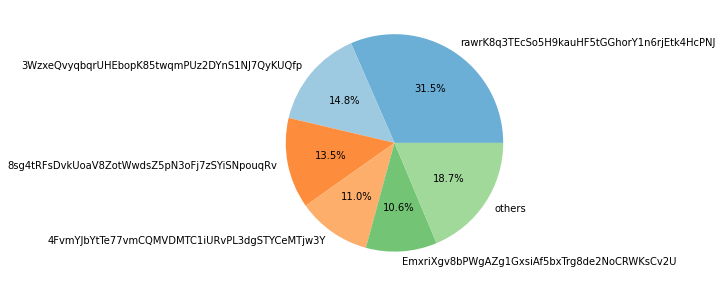

In [9]:
print("Liquidation Profit by Signer")
cmap = plt.get_cmap("tab20c")

inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10, 11]))
plot = df2.plot.pie(y='totalBotProfit', 
                    colors=inner_colors,
                    figsize=(5, 5) ,autopct='%1.1f%%', labels = df2['signer'], legend=None, ylabel="", title=None)

In [10]:
# Pie chart Bot By Profit
headers = list(liquidationByAssetGlobal.keys())
values = list(liquidationByAssetGlobal.values())

df = pd.DataFrame(
    data = {"totalLiquidated": liquidationByAssetGlobal.values(), "asset": liquidationByAssetGlobal.keys() },
    ).sort_values('totalLiquidated', ascending = False)
df2 = df[:10].copy()

#others
new_row = pd.DataFrame(data = {
    'asset' : ['others'],
    'totalLiquidated' : [df['totalLiquidated'][5:].sum()]
})

#combining top 5 with others
df2 = pd.concat([df2, new_row])
print(df2)



    totalLiquidated   asset
15     1.112128e+07     ust
0      6.484648e+06     sol
11     4.821311e+06    msol
3      2.363360e+06     btc
17     1.137474e+06   stsol
2      9.128183e+05   soeth
12     6.178065e+05     eth
1      5.756797e+05    usdc
8      5.319454e+05     ray
6      3.324171e+05   softt
0      3.465234e+06  others


Liquidation By Asset


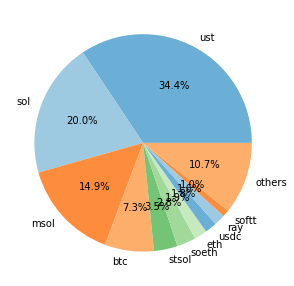

In [11]:
print("Liquidation By Asset")
cmap = plt.get_cmap("tab20c")

inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10, 11]))
plot = df2.plot.pie(y='totalLiquidated', 
                    colors=inner_colors,
                    figsize=(5, 5) ,autopct='%1.1f%%', labels = df2['asset'], legend=None, ylabel="", title=None)

In [12]:
label = ["Date", "SOL", "USDC", "soETH", "BTC", "SRM", "USDT", "soFTT", "ORCA", "RAY", "SBR", "MER", "mSOL", "ETH", "SLND", "scnSOL", "UST", "FTT", "cSOL", "cUSDC", "csoETH", "cBTC", "cSRM", "cUSDT", "csoFTT", "cORCA", "cRAY", "cSBR", "cMER", "cmSOL", "cETH", "cSLND", "cscnSOL", "cstSOL", "cUST", "cFTT"]
liquidatedAmountByDate = ["2022-03-16 00:00", 0.35172368600000004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-03-17 00:00", 0.000122143, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.015896179, 0, 0, 0, 0, 0, 0, 0, 0.017558, 0, 0.0007130000000000001, 0, 0, 0, 0, 0, 0, 0, "2022-03-18 00:00", 0.002769585, 4.816055, 0, 0, 0, 0.005648, 0, 0, 0.025422, 0, 0, 0.00038619900000000005, 0, 0, 0, 0, 0, 0, 0.006618000000000001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 6.927225000000001, 0, 0, 0.762741552, 0, "2022-03-19 00:00", 0.004213695, 40.705249, 0, 0, 0, 7.679642, 0, 0, 0.000124, 0, 0, 0, 0, 0, 0, 0.42908300000000005, 0, 0.004620964, 0, 0, 0, 0, 111.239714, 0.033244, 0, 0.56011, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-03-20 00:00", 0.007271425000000001, 0.009324, 0, 0, 0, 0, 0, 0, 0.115832, 0, 0, 0, 0, 0, 0, 0.069828, 0, 0.0037962770000000002, 0, 0, 0, 0, 2.141702, 0, 0, 0.37475600000000003, 0, 0, 23.679017333, 0, 0, 0, 0.011223967000000001, 0, 0, "2022-03-21 00:00", 41.25711264, 0, 0, 0, 0, 0, 0, 0, 0, 215.053538, 0, 0, 0, 0, 0, 0, 0, 0.008107272, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-03-22 00:00", 0.000093218, 0.063763, 0, 0, 0, 0.0037120000000000005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.13036, 0, 1.980616812, 0, 0, 0, 0, 8.335997, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-03-23 00:00", 1.5907493570000002, 234.433129, 0, 0, 0, 223.741387, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3.8930590000000005, 0, 0.0111363, 259.186109, 0, 0, 0, 10.046844, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-03-24 00:00", 2.255411734, 17663.026467000003, 0, 0, 0, 48.373001, 0, 0, 0, 0, 0, 0.6116363690000001, 0, 0, 0, 7.656818, 0, 0, 0, 0, 0, 0, 14.610984, 0, 0, 0, 0, 0, 9.811035745, 0, 0, 0, 0, 0, 0, "2022-03-25 00:00", 107.77116969500001, 511.70655899999997, 0, 0, 0, 0.105992, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.19193700000000002, 0, 0, 0, 0, 0, 0, 7.195039, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-03-26 00:00", 0, 0.12666000000000002, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-03-27 00:00", 0, 20142.856384, 0, 0, 0, 120.31245200000001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 15.493106000000001, 0, 0, 0.009915, 0, 0, 0, 4.6240250000000005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-03-28 00:00", 105.962859033, 5804.1120470000005, 0, 0, 0, 9.599946000000001, 0, 0, 0.0069830000000000005, 0, 0, 0, 0, 0, 0, 2.793353, 0, 0, 0.243489, 0, 0, 0, 5.606577000000001, 0, 0, 0, 0, 0, 0, 0, 2.10881, 0, 0, 0.5023374770000001, 0, "2022-03-29 00:00", 6.4813560390000005, 16072.489313, 0, 0, 0, 0.048236, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.173944, 0, 0, 130.175634, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-03-30 00:00", 18.631225267, 25787.394037, 0, 0, 0, 2.149874, 0.0019370000000000001, 0, 0, 0, 0, 0, 0, 0, 0, 211.531159, 0, 0, 28.036422, 0, 0.036184, 0, 2.643346, 0, 0, 0, 0, 0, 0, 0, 0.41308500000000004, 0, 0, 0.000056000000000000006, 0, "2022-03-31 00:00", 0.000229539, 13932.478501000001, 0, 0, 0, 7.842357000000001, 0.0013390000000000001, 0, 0, 0.307535, 0, 0, 0, 0, 0, 0.010412000000000001, 0, 0, 0, 0, 0, 0, 0.255334, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-01 00:00", 215.414705408, 31040.227007, 1.3070060000000001, 0.10838, 0, 0.593346, 0.000505, 0, 0, 0.5104430000000001, 0, 47.375006281, 0, 0, 0, 4439.481057, 0, 0.000260285, 33.0168, 0, 0.006241, 0, 0.5465, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3006.036469, 0, "2022-04-02 00:00", 49.565966936, 4666.599136000001, 0, 0, 0, 395.48787699999997, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2948.5166090000002, 0, 3.168413879, 373.204969, 0, 0, 0, 68.38456500000001, 0.00042100000000000004, 0, 0, 0, 0, 0, 0, 0, 0, 0, 268.799559, 0, "2022-04-03 00:00", 25.355975637, 2419.963939, 0, 0, 0, 0, 0, 0, 4.153466, 0, 0, 0, 0, 0.24782700000000002, 0, 0, 0, 0, 0.722913, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-04 00:00", 65.67047482800001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.047256, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-05 00:00", 20.490644521, 0, 0, 0, 0, 0, 0, 0, 234.564599, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.000032000000000000005, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-06 00:00", 2488.429266884, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.9714694330000002, 0, 0, 0, 0, 0, 30570.749705350998, 0, 0, 0, 303.049189, 0, 1.551098, 0, 301.018379, 0, 0, 291.519797917, 0, 0, 0, 30.142687427000006, 0, 109.38792572000001, "2022-04-07 00:00", 59.549046945, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1.501787895, 0, 0, 0, 0, 0, 2333.614350787, 0, 0, 0.012697000000000002, 1914.7716110000001, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11.462553810000001, 0, 0, "2022-04-08 00:00", 2354.41618512, 0.0053230000000000005, 0, 0, 0, 0, 0, 0, 1.8009410000000001, 0, 0, 9.502304464, 0, 0, 0, 0, 0, 3252.105095491, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 79.31086290500001, 0, 0, 0, 30.103800129, 0, 0, "2022-04-09 00:00", 1.6554581830000001, 0, 0, 0, 0, 0, 0, 0, 2.133748, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.27989200000000003, 0, 0, 0, 0, 0, 0, 3.7450939150000004, 0, 0, "2022-04-10 00:00", 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-11 00:00", 1626.600289735, 67.566552, 1.8140740000000002, 0.032737, 70.03012600000001, 0, 0.8742700000000001, 0, 911.493735, 0, 0, 65.735278232, 0, 0, 0.009149468000000001, 0, 0, 1078.062814577, 0, 0.014667000000000001, 0.6509400000000001, 7.002732000000001, 0, 0, 0, 1172.553359, 0, 0, 155.07563991700002, 0.9777902100000001, 196.084366, 0, 318.622320137, 0, 74.74174747, "2022-04-12 00:00", 6.1e-8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 97.673247, 0, 0, 0, 0, 0, 0, 0, "2022-04-13 00:00", 0, 0, 0, 0, 0, 0, 0, 0, 0.144574, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-14 00:00", 5.681938101, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.041119220000000005, 0, 0, 0, 0, 0, 0, "2022-04-16 00:00", 0, 0, 0, 0, 0, 0, 0, 0, 1.183232, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-17 00:00", 0, 0, 0, 0, 0, 0, 0, 0, 51.281564, 8587.676078, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.000255, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-18 00:00", 56.21677282300001, 0.000657, 0, 0, 0, 0, 0, 0, 97.12687600000001, 371.59364999999997, 0, 8.914637604000001, 0, 0, 0, 0, 0, 727.468915103, 0, 2.595235, 0, 0, 0, 0, 0, 18.174310000000002, 0, 0, 50.723861658, 0, 0, 0, 101.016018321, 0, 0, "2022-04-19 00:00", 0, 0, 0, 0, 0, 0, 0, 0, 0.039993, 93.627497, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.027914, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-20 00:00", 0.00013499600000000002, 0.001324, 0, 0, 0, 0, 0, 0, 0.000081, 4598.067012, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 23.507486, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-21 00:00", 29.048619926, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.032946, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-22 00:00", 8.339124322, 0, 0, 0, 0, 0, 0, 0, 0, 473.014156, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-23 00:00", 2.9926755610000004, 0, 0, 0, 0, 0, 0, 0, 0, 242.853812, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-24 00:00", 0, 0, 0, 0, 0, 0, 0, 0, 0, 4546.721139, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-25 00:00", 17.553170148, 0, 0.037259, 0, 54.173208, 0, 0, 0, 70.224445, 4340.104017000001, 63.244276000000006, 0.134995778, 0, 0, 0, 0, 0, 4.6108450020000005, 0, 2.130323, 0, 129.22049, 0, 0, 0, 803.140261, 0, 0, 5.693715479000001, 0, 4920.105573, 0, 0, 0, 0, "2022-04-26 00:00", 0.24214162900000002, 0, 0, 0, 0, 0, 0, 0, 94.112171, 775.069069, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.052139000000000005, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-27 00:00", 0, 0, 0, 0, 0, 0, 0, 0, 204.481233, 364.336954, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 191.040222, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-28 00:00", 0, 0, 0, 0, 0, 0, 0, 0, 7.599159, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-04-29 00:00", 14.655377236000001, 0.00011800000000000001, 0, 0, 0, 0, 0, 0, 69.274158, 0, 0, 0.479215516, 0, 0, 0.338683497, 62.31215, 0, 623.558587341, 0, 0, 0, 786.491597, 0, 0, 0, 430.688515, 0, 0, 31.804584988000002, 0, 0, 0, 66.280159749, 0, 0, "2022-04-30 00:00", 10.141607773, 0.00007400000000000001, 0, 0, 2.353475, 0, 0, 0, 588.425544, 0, 0, 1.418065053, 0, 0, 0, 0, 0, 503.70850081799995, 0, 0, 0.009139000000000001, 0, 0, 0, 0, 2154.842392, 0, 0, 10.830451109, 0, 0, 0, 54.144989877, 0, 0, "2022-05-01 00:00", 39.037230832000006, 0.000047000000000000004, 0, 0.02605, 0, 0, 0, 0, 605.880987, 0, 0, 15.520598353, 0, 30.249157000000004, 0.229313656, 27.525446000000002, 0.40512424, 1408.050780024, 0, 0, 0.286157, 0.039897, 0, 0, 0, 63330.851995000005, 0, 0, 29.223147092999998, 0, 0, 0, 44.467340478000004, 0, 0, "2022-05-02 00:00", 160.60801375900002, 5.0355620000000005, 0, 0, 0.5841550000000001, 0, 0, 0, 178.36567000000002, 0, 0, 30.605253862, 0, 0, 0, 0, 0, 577.1206936579999, 0, 0, 0, 0, 0, 0, 0, 0.007498, 0, 0, 0, 0, 0, 0, 36.61243712, 0, 0, "2022-05-03 00:00", 31.360914671000003, 0.000301, 0, 0.014498, 0.852434, 0, 0.483976, 0, 152.234025, 0, 0, 3.017615401, 0, 62.61091700000001, 0, 16.693209, 0, 112.78274700000001, 0, 0, 0.227032, 0, 0, 8.482625, 0, 0, 0, 0, 0.008968935, 0, 0.6718470000000001, 0, 45.598028689, 0, 33.619945560000005, "2022-05-04 00:00", 0, 6.375379000000001, 0, 0, 0, 0, 0, 0, 219.296484, 0, 0, 0, 0, 3.112452, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, "2022-05-05 00:00", 817.891605248, 5298.5866670000005, 0.020357, 0.028416000000000004, 129.850679, 0, 4.336165, 0, 720.219266, 360.598294, 0, 18.707251066, 0, 63.986172, 0.133181978, 0, 0, 2129.752340436, 270.610475, 3.865899, 1.1973170000000002, 0, 0, 35.772897, 0, 416.155821, 0, 0, 32.161434977, 0, 0, 0, 75.23781440900001, 0, 73.03090145, "2022-05-06 00:00", 203.657954439, 10.741353, 0, 0.193948, 2.5446880000000003, 8.300107, 0, 0, 144.298553, 0, 0, 11.884495693000002, 0.00000807, 29.289238, 0.109077379, 154.223137, 0, 463.699311051, 0, 0, 0.049964, 15036.883327000001, 0, 0, 0, 359.458937, 0, 0, 8.639633738, 0.9525346200000001, 2911.877469, 0, 26.503053531000006, 0, 39.681216840000005, "2022-05-07 00:00", 1287.183009751, 4.523493, 0.042136, 0.050902, 31588.901313, 0, 0, 0, 264.368735, 0, 0, 24.003555844999998, 0.00000618, 8.362769, 0.004958625, 218.543188, 0, 2629.713263915, 0, 1.694782, 0.020031, 0, 0, 9.892325000000001, 0, 2042.8260260000002, 0, 0, 406.26893078899997, 0, 4337.606801, 0, 345.20245502, 0, 0, "2022-05-08 00:00", 3222.990486644, 39.007020000000004, 0.049857000000000005, 0.8641510000000001, 111.111502, 0.9999500000000001, 0.671428, 0, 27957.445819000004, 646.967233, 0, 18.595995735000002, 0.08295377000000001, 432.444714, 0.061215132000000005, 51.441715, 0, 2843.9342672690004, 0, 0, 0.23650200000000002, 397.484048, 0, 0, 0, 606.37738, 0, 0, 38.001603341, 0.78250567, 0, 0, 62.798467465, 0, 33.41583944, "2022-05-09 00:00", 17176.498773926003, 10662.703588, 82.94660900000001, 8.305827, 63416.332372, 84.05455500000001, 954.241072, 0, 99625.078379, 218048.412773, 336.86062499999997, 1546.575366335, 23.90612003, 7653.542222000001, 12.265040243000001, 935840.265791, 41.816471670000006, 9856.357087881002, 2891.759223, 57.363373, 5.759683000000001, 30310.987398, 211.544184, 80.775896, 0, 100766.197571, 0, 0, 33686.858155374, 3.01779331, 3601.8335250000005, 0, 1438.3204004049999, 4019838.702269, 30.29773902, "2022-05-10 00:00", 1454.027940101, 5909.5970449999995, 0.9435850000000001, 2.616007, 1004.0776139999999, 88428.581007, 151.27691000000002, 0, 1179.7408030000001, 703.769056, 0, 10631.712356406, 15.6864667, 38293.999637, 0.18635047200000002, 7740229.709223, 0, 2145.18174546, 865.1602819999999, 85.910662, 2.6228170000000004, 154.113986, 304.647103, 31.095496, 0, 1079.2456550000002, 0, 0, 5780.914893424, 9.19022805, 1245.8436649999999, 0, 753.20086711, 1752906.161457, 0, "2022-05-11 00:00", 36722.898483591, 219837.504316, 126.581197, 24.873306000000003, 9780.537891000002, 19857.828636, 5052.157471000001, 211.778888, 53444.878133, 60376.336704999994, 724.473398, 15544.762508644, 84.23984213, 26518.564972, 16.495447241, 3562803.6988850003, 2104.50592681, 25000.5728788, 25329.23502, 43.567584000000004, 17.687808, 23737.009473, 0.40721700000000005, 508.594601, 0, 91075.449372, 0, 0, 18780.941976465998, 52.18654683000001, 5405.601360000001, 0.006936769000000001, 13682.95663183, 3728004.36612, 7516.71212205, "2022-05-12 00:00", 7589.629017936, 9802.357866, 11.907015000000001, 9.280355, 9203.882818, 347.715786, 11.447654, 1.6269500000000001, 19812.63904, 8616.197147, 174.127193, 4560.197532761001, 45.503733190000005, 7954.374251000001, 3.8917445290000003, 34498.935923000005, 7.293411430000001, 19873.697494395, 8963.586135000001, 32.145747, 6.553359, 1822.9618689999998, 17310.762199, 3663.6977720000004, 757.639531, 14072.868647000001, 0, 72.608805, 2003.3478033810002, 56.52205831000001, 3219.202454, 0.007755526, 5759.560471903, 53853.711873, 1575.36153968, "2022-05-13 00:00", 69.989812657, 167752.38289200002, 0.518008, 0.115721, 0.00010800000000000001, 51.279532, 6.421274, 130.39719000000002, 633.294562, 6663.701699000001, 931.5732409999998, 108.143008433, 8.15918252, 2870.5129920000004, 1.502160538, 205454.605266, 0, 34.219554419000005, 123625.907256, 0, 0.246594, 316.984087, 365.43859399999997, 53.16440600000001, 0, 1266.964548, 0, 0, 17.747889272000002, 0.6456237, 1961.4043450000001, 0, 173.45537906100003, 206714.809393, 60.51593889, "2022-05-14 00:00", 6.134026694, 0.484358, 0.0027640000000000004, 0, 0, 1.6140040000000002, 0.0007170000000000001, 0, 939.1311249999999, 0, 0, 1.084410756, 0, 6.426013, 0, 2214.326658, 0, 0.000026932000000000002, 0, 0, 0.001897, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 158.83634800000002, 0, "2022-05-15 00:00", 6.773493732, 42.800535, 0, 0, 0, 0, 0, 0, 0.000008000000000000001, 0, 0, 0, 0, 1.008766, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.9376160000000001, 0, 0.0014958620000000001, 0, 0]

dateToVolume = None 
for measure, cff in [("volume", 1), ("profit", 0.05)]:
    dateToProfit = {}
    totalLiquidationProfit = 0
    for i in range(0, len(liquidatedAmountByDate), len(label)):
        date = liquidatedAmountByDate[i]
        curProfit = 0
        for j in range(i+1, i + len(label) - 1):
            try:
                price = newPrices[label[j-i]]

            except:
                try:
                    price = newPrices[label[j-i].lower()]
                except:
                    price = newPrices["c" + label[j-i]]

            profit = liquidatedAmountByDate[j] * price * cff
            curProfit += profit
        totalLiquidationProfit += curProfit 
        dateToProfit[date] = "${:,.2f}".format(curProfit )
    if not dateToVolume:
        dateToVolume = dateToProfit
    dateToProfitList = dateToProfit.items()
    dateToProfitList = sorted( dateToProfitList, key= lambda x: (-float( x[1].replace(",", "").replace('$', "")), x[1]) )
    print ("total liquidation " + measure, "${:,.2f}".format(totalLiquidationProfit))
    print()
    print(tabulate([("date", measure)] + dateToProfitList, headers="firstrow"))
    print()

total liquidation volume $33,005,264.55

date              volume
----------------  --------------
2022-05-11 00:00  $12,044,582.67
2022-05-09 00:00  $7,005,140.29
2022-05-10 00:00  $6,365,361.11
2022-05-12 00:00  $3,117,270.64
2022-04-06 00:00  $1,737,074.45
2022-05-13 00:00  $559,583.00
2022-05-08 00:00  $394,928.31
2022-05-07 00:00  $299,429.50
2022-04-08 00:00  $297,782.37
2022-05-05 00:00  $213,414.30
2022-04-11 00:00  $198,245.79
2022-05-01 00:00  $171,869.20
2022-04-07 00:00  $128,033.97
2022-05-06 00:00  $70,226.10
2022-04-18 00:00  $54,628.18
2022-04-01 00:00  $54,621.50
2022-05-02 00:00  $42,101.16
2022-04-29 00:00  $40,043.85
2022-04-30 00:00  $33,995.98
2022-03-30 00:00  $27,986.75
2022-03-27 00:00  $20,275.55
2022-03-24 00:00  $18,389.23
2022-05-03 00:00  $17,870.13
2022-03-29 00:00  $16,540.40
2022-03-31 00:00  $13,940.64
2022-04-25 00:00  $12,856.52
2022-03-28 00:00  $11,334.71
2022-04-02 00:00  $9,855.06
2022-03-25 00:00  $6,124.28
2022-04-03 00:00  $3,745.09
2022-04-04

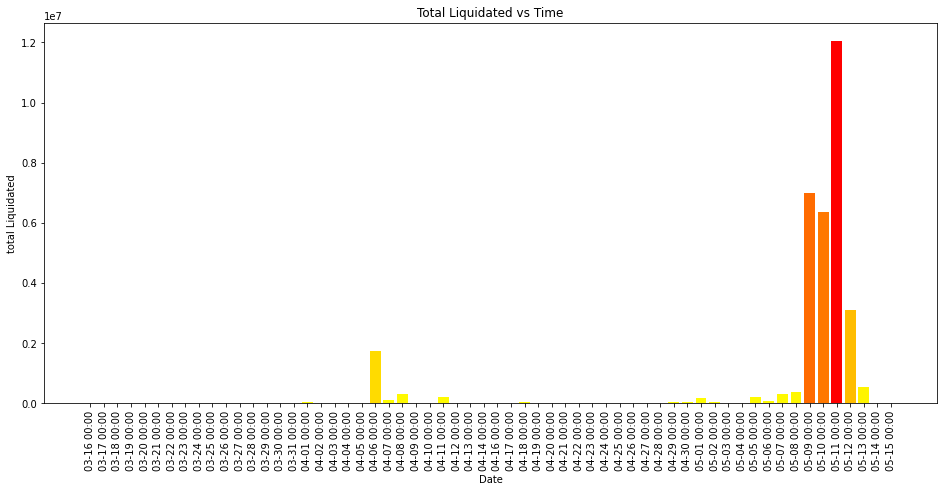

In [13]:
from datetime import datetime

volumeOverTime = map( lambda x: (x[0], float( x[1].replace(",", "").replace('$', ""))), sorted( dateToVolume.items(), key= lambda x: datetime.strptime(x[0], "%Y-%m-%d %H:%M") ))
totalProfitWithoutWH = 0
time = []
timeProfit = []
monthlyProfit = Counter()
for date, volume in volumeOverTime:
    time.append(date.replace("2022-", "").replace("2021-", ""))
    timeProfit.append(volume)
#     monthlyProfit[date.split("-")[1]] += (solProfit * SOL_PRICE + usdcProfit)
    
# print(monthlyProfit)
# print("total profit past 30 days", "${:,.2f}".format(totalProfitWithoutWH))
x_pos = [i for i, _ in enumerate(time)]
my_cmap = plt.get_cmap("autumn_r")

f = plt.figure()
f.set_figwidth(16)
f.set_figheight(7)
rescale = lambda y: (y - np.min(y)) / (np.max(y) - np.min(y))
plt.bar(x_pos, timeProfit, color=my_cmap(rescale(timeProfit)))
plt.xlabel("Date")
plt.ylabel("total Liquidated")
plt.title("Total Liquidated vs Time")

plt.xticks(x_pos, time, rotation='vertical')

plt.show()

In [14]:
topTxsSolRaw7 = ["4TRJvtTyoxQh3hYoV4yEzGtp7j32f3MZ3RyYyTnbtFFMRBjZUJ8YrpaBR227RUGZBWdMXbs9eyhZfzKJn6ZMHE4C", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 2570.431892592, "4Yo9RLui2y77nsdFczbKgwaemXrDYTxge4XQxVFMFfD7QGtVa5KvpATtJ9uXYejtf16ojTNQtZEdwKDCAnsThP5m", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 2343.4979477170004, "2zDvQTFmFTXcaAXB8jWRKytR66MwVb3d82Nyjkj2MGFQNWy446bpUCAKmpz2garpwJxuoYBivcHqo1uPjgj8k4wy", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 2157.8645495160004, "2QfChkHwvN6kntH3k87cbALShdEKvhURGxP9JeB79F75XEkXySNQ6bEc6iV5vjdff7neu68esedWTd4eNQsouDu9", "qyF7Txt2MGUTXkiyJQtirCvnJCZfVLVzMkXzX4oqA4B", 1484.777938818, "2fmRjRm5TLZKuQ5auYKDXvDQgg8wz9EgYVo9a6mKgADjdV8TsTFGvmzw5DZd2jadzva4Q3vtZ9KaQ2gCdVaYxr5G", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 1457.027298981, "2ydx5FRNkq37VtwjPGJWnmUUHRRyEiuiipikkE1bEdtn1khCJeDq8dxAMCE4k4GVLgnUwcbk8XrmhEBgbmMB8p6H", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 1425.427087689, "4yDcdF5zapXPkvQzKFE7M1nERDHCbjWTLYcgdKqiEPWr3sXihUWS8ME8PnS58mHZw6p73x9DvmJh3jNYiFe5w7Qg", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 1140.341670151, "DVjPvA6RXJbfBdfHS4L9bjMeTETt7M6z6SbLim5ihCxWRJYeotSA9MiZbyU3hpsDyu8kMQ8MF656LTdE2KQqJjm", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 1066.1068172619998, "3qDzjsCgNFknQpZQhgTDNsLHy3rRtUj3FtMgHjZVqvm4xTDd1KowfRB9TpYnVPT1WCq9d9bhvwgp9NWbn69X8e5m", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 990.541706481, "sYroVPSxc93PLsb27AheBZofwiF7zAs7QWBoyaJbFZCh8nWfEwNnJhKB6KoLFsB93vGE3zeQiafofqktYeBjKDt", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 965.6926847220001, "ZhcYroNSqYyymuA8rVycEixz9zM4nLk4YmFyxypuFLZyxoqKNJydwyPg7jSUbDdPMZjdqzs8E9WNh6HfMowY57c", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 911.208379639, "ntR6hnjPmPje7SCtK6C1jLx2vS174cqAx3Z2sA8kH5NAeMsiDFoiBqGHSMjb5fpSmti2b6whf3CoaXBiYh62VV3", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 807.073109178, "35CQb34dBYc1RfGNG7TNa5Yj79AyzTFV1BzWHUoRJqn9GWjdrbfiFovZBttJLtA6UCn1k1fUrNsW918AL8QEE5Xq", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 759.9341094419999, "3fUwa1k7RhMhNASjkYKRkN2Hd3EFfx6TdWVHUJcYamjozFmQnkDZtoefKkvGraLvvFvTmgk2KN24MvLDu2HgSBJq", "F4q2bm6k4AW2rgQMBfvoNnfn1xFkoD98We6uJd6tV7tq", 748.8775711029999, "3ZdkAmYntcFNFPR121zEbgu8Atc8mf7X2LwKm8QLxT1Jc7MapWCTNzm6qBtz3jQRR4eCnv2kBghwbhEFxeiqpJbt", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 657.188187004, "4SzW2yUasp3gCepgwC5hXLYf36LQ2DFSnRUNJRFzxm52TahPDVbYWSQ2dz61Hh4TK12fkqZPJCXVcvmm4BYPAEPK", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 630.820250844, "2BDoD3DyKWVsdE7DsGqKL9eCY23qwLQ35M7uUUxVbY2Yj9Nyuup8rJjqQyKXu6zwiptTE27bV3Wg8VqAz6mJDR7S", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 569.530227811, "fd4k2oHu6PuLTENuGE82x5kgpiNcvzKm6xmwrqBCfxxkzsJAJFYxLiuZifH24YEYoscYU3i5cpUAnUrxnfRCF6u", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 560.641716177, "2CsH6NfhHTMYSdiSnvdkhNNMcGXth5mAfr8cy4HZnQJm15NL69LhuyWYoENQ8ESTFWHVvXU2P4NaCFR5FTprAbuW", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 556.836386835, "8M3jim8tncoAkmm8ky44D3yEziF9PivGuYisy9dEECNbNh7tXgWLz7zPJRHJZJiogJWptnaA1o5XmwaXxTnMgou", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 554.912478311, "4omv1ksUdP2wv4AiVEfGFDJGyCU2ggeq8iPo6mhWPjHmMEwbZHomRuJC2XoY1AjU7QzD3q2DMLcQPpvQ4uuEqvdT", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 505.34157622099997, "3i94d3jkyvHEBuBUWu6oXvdVbHXfTnKQQx65QSApcpScZxJdEyo9upgrahnDwCkP3XwMsSnwwQpwP7Z17ccQokHY", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 497.531068444, "5voGjHD2K6xJZ1PXuBUAcjWj3akLcnCx5TrrFzAHL3wrUxiGLgkmp78gLK8RrPwVRjbBLRYD8Bxs3YpCH7XDQHr", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 464.92612620999995, "5wncGRXg9MQaK2Dghn8QmWzs7NCJCU9WaEc5u6NAXYcjgekiqLumHALxJukF3QsZWPhrsjHmEC3joQuuWr7ffVFR", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 451.673063216, "4VaBgGB7BTf3UbjuuFbbzP5stF2aMVDBzsE4avrRnMLmk6VV79ECReCCa41AmWgTiAaw8uyk8wSFwpwj4cA5tBek", "rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ", 398.261948815]

topTxsSol = [topTxsSolRaw7 ]

signerCount = Counter()
for i, data in enumerate(topTxsSol):
    day = ("0" if i == 0 else str(days[i-1])) + " - " + str(days[i])
    curTable = [[day + "days Top Sol profit", "signer", "TxId"]]
    for i in range(0, len(data), 3):
        curTable.append([ "{:,.2f} SOL".format(data[i+2]), data[i+1], data[i]])
        signerCount[data[i]] += 1
    print(tabulate(curTable, headers='firstrow'))
    print()

0 - 7days Top Sol profit    signer                                        TxId
--------------------------  --------------------------------------------  ----------------------------------------------------------------------------------------
2,570.43 SOL                rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ   4TRJvtTyoxQh3hYoV4yEzGtp7j32f3MZ3RyYyTnbtFFMRBjZUJ8YrpaBR227RUGZBWdMXbs9eyhZfzKJn6ZMHE4C
2,343.50 SOL                rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ   4Yo9RLui2y77nsdFczbKgwaemXrDYTxge4XQxVFMFfD7QGtVa5KvpATtJ9uXYejtf16ojTNQtZEdwKDCAnsThP5m
2,157.86 SOL                rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ   2zDvQTFmFTXcaAXB8jWRKytR66MwVb3d82Nyjkj2MGFQNWy446bpUCAKmpz2garpwJxuoYBivcHqo1uPjgj8k4wy
1,484.78 SOL                qyF7Txt2MGUTXkiyJQtirCvnJCZfVLVzMkXzX4oqA4B   2QfChkHwvN6kntH3k87cbALShdEKvhURGxP9JeB79F75XEkXySNQ6bEc6iV5vjdff7neu68esedWTd4eNQsouDu9
1,457.03 SOL                rawrK8q3TEcSo5H9kauHF5tGGhorY1n6rjEtk4HcPNJ   2fmRjRm5TLZKuQ5auYKDXvDQgg8wz9Eg

In [15]:
label = ["Signer", "SOL", "USDC", "soETH", "BTC",  "SRM","USDT","stSOL", "ray", "orca", "msol", "ust", "ustv2"]
liquidatedAmount = ["2yqtmwucK6fbPctDdTz48qUsqz9Sgv6rvH9wgzTq2mt1", 1.078513612, 0, 0.000155, 0, 0.072215, 239.537091, 0.08577056400000001, 59.507643, 21.435950000000002, 0.47214119000000004, 0, 1545.0779009999999, "98RYzpMirADjKfHqK3HZq2RApp3JURt6wvHVehEbhsKG", 4909.961175135, 0, 2.679148, 0, 0, 16765.641591000003, 2297.1112960650003, 2131.874225, 5985.156028, 1345.619271836, 0, 59518.878899, "4pXvPjSwskCmY6sP4bgNRTtXa42btbURGSzrEtZsspqN", 3.7474681430000003, 0, 0.0013900000000000002, 0, 0, 126.81005100000002, 0.24493815400000002, 45.455575, 32.651892000000004, 0.102367858, 0, 376.086876, "GqC7CsH4eMJth4f6UAfGByG1D8vD59xjAokMvL7WSQFG", 50.471449957000004, 0, 0.034645, 0, 69.461432, 1311.241974, 83.90378743500001, 47.483945000000006, 1420.8513910000001, 19.000423337, 0, 13298.535656000002, "4FvmYJbYtTe77vmCQMVDMTC1iURvPL3dgSTYCeMTjw3Y", 311.578073892, 0, 0.011586, 0, 81.516683, 20.914021, 0, 12.577198000000001, 1509.564096, 999.3629575189999, 0, 290575.20829100005, "FAdiGyEZ6D9HU3ahZtqJ1NmZFqAx9zNzaP1vGDinmHum", 18.940843601, 0, 0.000145, 0, 0.8466670000000001, 495.334821, 0.559296142, 16.671567, 49.034992, 0.513331748, 0, 1750.1499079999999, "BdxkPBXL1YfxSKGmHrk7t8qwtZiqAmRUqMfVCH1Vrx7N", 2.038246388, 0, 0, 0, 38.633977, 242.989928, 0.8205961780000001, 10.204881, 114.76179, 0.021507682, 0, 907.294026]

signerToProfit = {}
totalLiquidationProfit = 0
for i in range(0, len(liquidatedAmount), len(label)):
    signer = liquidatedAmount[i]
    curProfit = 0
    for j in range(i+1, i + len(label) - 1):
        
        price = newPrices[ label[j-i]]
        profit = liquidatedAmount[j] * price
        curProfit += profit
    totalLiquidationProfit += curProfit * 0.05
    signerToProfit[signer] = "${:,.2f}".format(curProfit * 0.05)
    

signerToProfitList = signerToProfit.items()
signerToProfitList = sorted( signerToProfitList, key= lambda x: (-float( x[1].replace(",", "").replace('$', "")), x[1]) )
print ("total liquidation profit Apricot", "${:,.2f}".format(totalLiquidationProfit))
print()
print(tabulate(["signer, profit"] + signerToProfitList, headers="firstrow"))


total liquidation profit Apricot $27,943.40

s                                             i
--------------------------------------------  ----------
98RYzpMirADjKfHqK3HZq2RApp3JURt6wvHVehEbhsKG  $23,766.11
4FvmYJbYtTe77vmCQMVDMTC1iURvPL3dgSTYCeMTjw3Y  $3,486.18
GqC7CsH4eMJth4f6UAfGByG1D8vD59xjAokMvL7WSQFG  $540.26
FAdiGyEZ6D9HU3ahZtqJ1NmZFqAx9zNzaP1vGDinmHum  $80.19
BdxkPBXL1YfxSKGmHrk7t8qwtZiqAmRUqMfVCH1Vrx7N  $28.05
4pXvPjSwskCmY6sP4bgNRTtXa42btbURGSzrEtZsspqN  $21.55
2yqtmwucK6fbPctDdTz48qUsqz9Sgv6rvH9wgzTq2mt1  $21.07
